The aim of this project is to gain a deeper understanding of how a hyperspectral pushbroom instrument performs.

Your task is to carefully read and analyze the information given in this folder, then recreate the following aspects of the pre-launch characterization:
In your recreation, you will need to apply mathematical formulas and models to calculate the instrument's performance metrics. 
You will also need to interpret the results and draw conclusions about the instrument's capabilities and limitations.

All referenced papers are included in the [Supporting Material] folder. In your recreation, you will be using an instrument known as HSI V4. 

This assignment aims to develop your skills in scientific research, data analysis, and problem-solving. By recreating the pre-launch characterization of the HYPSO-1 
hyperspectral imager, you will gain a deeper understanding of the challenges involved in designing and testing satellite instruments.

This Notebook is filled with a module to make a mock spectrogram so that you can test various things before going to the lab.


------
Some of the code you need to complete this project is provided as part of this reposiotory.
The code is developed using conda, and we recomend that you do the same.
Here is a step-by-step guide on how to install conda and create the desired environment.

**Installing Conda**

To get started, you'll need to install conda, which is a package manager for Python. You can do this by following these steps:

1. **For Windows**: Download the Anaconda installer from the official Anaconda website: <https://www.anaconda.com/products/individual>. Choose the "Custom" installation option and select only the "conda" component.
2. **For macOS (using Homebrew)**: Run the following command in your terminal: `brew install anaconda`
3. **For Linux**: You can install conda using a package manager like apt-get or yum, or by downloading the installer from the Anaconda website.

**Creating an Environment**

Once you have installed conda, you can create a new environment to isolate your Python packages and dependencies. Here's how:

1. Open a terminal or command prompt.
2. Type `conda create env -f <path-to-"envirnoment.yml">`
3. Activate the environment by typing `conda activate ttk4265`.
4. You should now see `(ttk4265)` at the beginning of your command prompt, indicating that you are working within the newly created environment.
5. The packages you need should be included then
6. To install other packages or dependencies, use the `conda install` command followed by the package name (e.g., `conda install numpy`).
7. When you're finished working in this environment, deactivate it by typing `conda deactivate`.

In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Test code to display Hyperspectral images

# # base_folder = r'C:\Users\ariaa\Documents\!PhD\Optisk Fjernmåling\TTK4265-assignment1-group1-data'
# # base_folder = r'C:\Users\ariaa\OneDrive - NTNU\!PhD\Optisk Fjernmåling\Optikklab\Code\Assignment_1\Data'
# base_folder = './Data/Ar'
# file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
# file_name2 =  '1727163193.770_00002_e999.8941_g008_1936x1216.bip'
# file_path1 = os.path.join(base_folder, file_name1)
# file_path2 = os.path.join(base_folder, file_name2)
# base_folder = './Data/Hg'
# file_name3 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
# file_name4 =  '1727162666.802_00001_e999.8941_g017_1936x1216.bip'
# file_path3 = os.path.join(base_folder, file_name3)
# file_path4 = os.path.join(base_folder, file_name4)

# # file_path1 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163191.770_00000_e999.8941_g008_1936x1216.bip'
# # file_path3 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163193.770_00002_e999.8941_g008_1936x1216.bip'
        
# datacube1 = np.fromfile(file_path1, dtype='uint16')
# datacube2 = np.fromfile(file_path2, dtype='uint16')
# datacube3 = np.fromfile(file_path3, dtype='uint16')
# datacube4 = np.fromfile(file_path4, dtype='uint16')

# # Reshape datacube.
# samples = 1
# bands = 1936
# datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]
# datacube2 = datacube2.reshape((-1, samples, bands))[:,0,::-1]
# datacube3 = datacube3.reshape((-1, samples, bands))[:,0,::-1]
# datacube4 = datacube4.reshape((-1, samples, bands))[:,0,::-1]

# plt.imshow(datacube1)
# plt.figure()
# plt.imshow(datacube2)
# plt.figure()
# plt.imshow(datacube3)
# plt.figure()
# plt.imshow(datacube4)

# # C:\\Users\\ariaa\\OneDrive - NTNU\\!PhD\\Optisk Fjernmåling\\Code\\Assignment_1\\Data\\Ar\\1727163193.770_00002_e999.8941_g008_1936x1216.bip


# Radiometric Calibration - Aria

Questions: 
- was the W of the lamp 100W? and what is then the  [mW/(m^2 nm sr)]
- is exposure time in ms?
- seems that the dark images we have taken have diff exposure time then the radiometric images, what to do?
- Is the output value of the radiometric images in counts?
- When calculating the Spectral calibration RMSE, dont we need the actual spectral lines of Ar and Hg? 

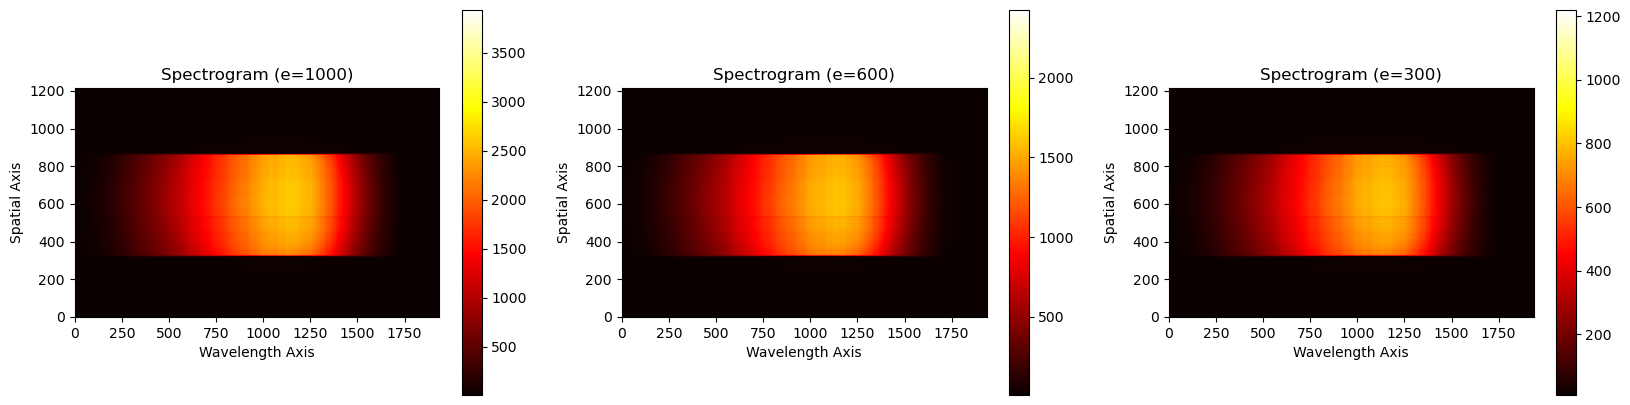

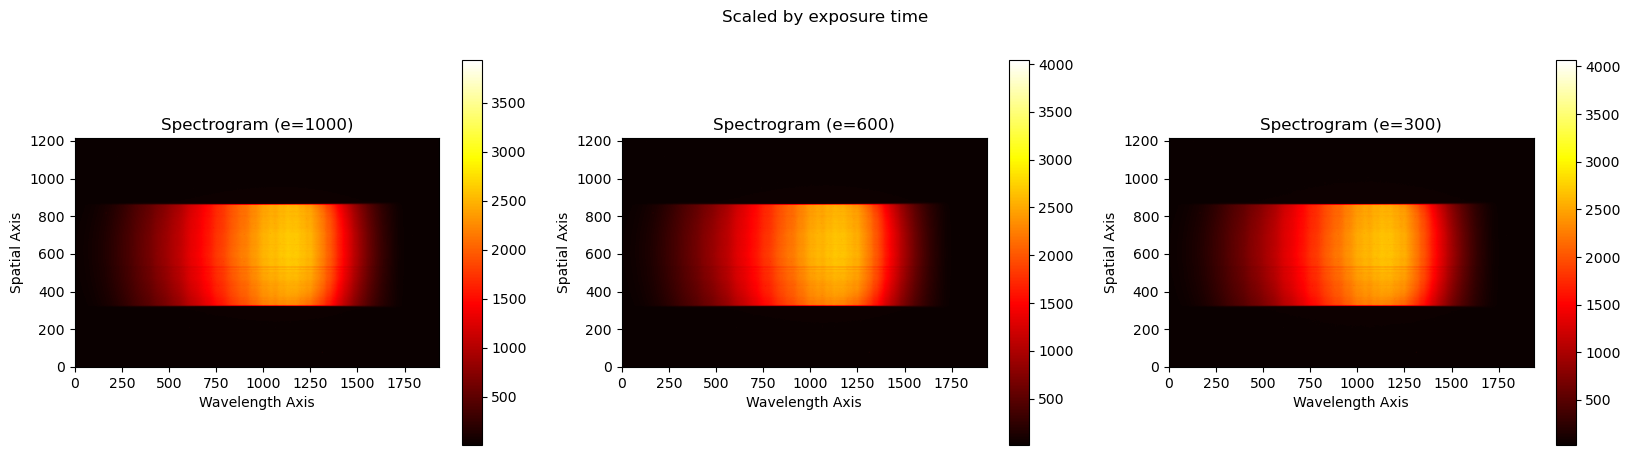

In [3]:
# take avg. image for each exposure


base_folder = r'.\Data\radiometric'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16')
avg_cube_e1000 = np.zeros_like(datacube) # init. empty empty average datacube
avg_cube_e600 = np.zeros_like(datacube) # init. empty empty average datacube
avg_cube_e300 = np.zeros_like(datacube) # init. empty empty average datacube

# make avg. image for e=1000
for file in file_list[:10]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e1000 += datacube
avg_cube_e1000 = avg_cube_e1000/10
avg_cube_e1000 = avg_cube_e1000.reshape((-1, samples, bands))[:,0,::-1]

# make avg. image for e=600
for file in file_list[10:20]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e600 += datacube
avg_cube_e600 = avg_cube_e600/10
avg_cube_e600 = avg_cube_e600.reshape((-1, samples, bands))[:,0,::-1]

# make avg. image for e=300
for file in file_list[20:30]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e300 += datacube
avg_cube_e300 = avg_cube_e300/10
avg_cube_e300 = avg_cube_e300.reshape((-1, samples, bands))[:,0,::-1]

# Visualize output-
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(avg_cube_e1000, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=1000)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(avg_cube_e600, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=600)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(avg_cube_e300, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


# Visualize normalized output
plt.figure(figsize=(20,5))
plt.suptitle('Scaled by exposure time')
plt.subplot(1,3,1)
plt.imshow(avg_cube_e1000/1, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=1000)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(avg_cube_e600/0.6, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=600)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(avg_cube_e300/0.3, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


K = LS <br>
L = 100

### Calculate K

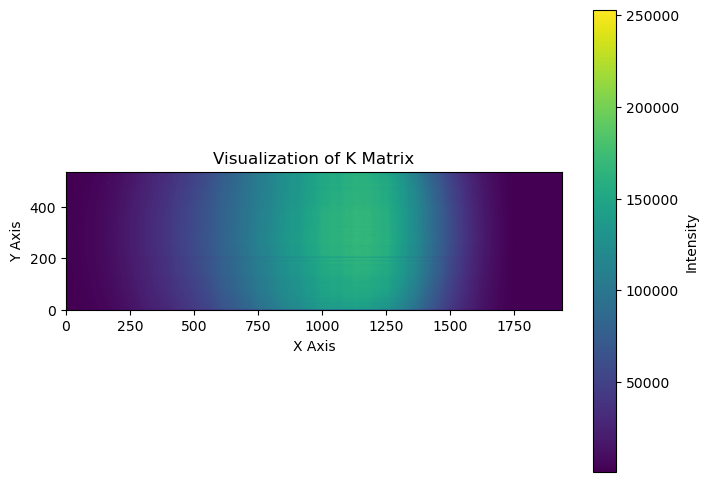

In [4]:
# calculate the K's
edge1=323 
edge2=860 
L = 100

avg_avg_cube = 1/3 * (avg_cube_e300 + avg_cube_e600 + avg_cube_e1000)
K = avg_avg_cube[edge1:edge2,:] * L

# Visualize the matrix K
plt.figure(figsize=(8, 6))
plt.imshow(K, cmap='viridis', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Visualization of K Matrix')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

### Find edges in image

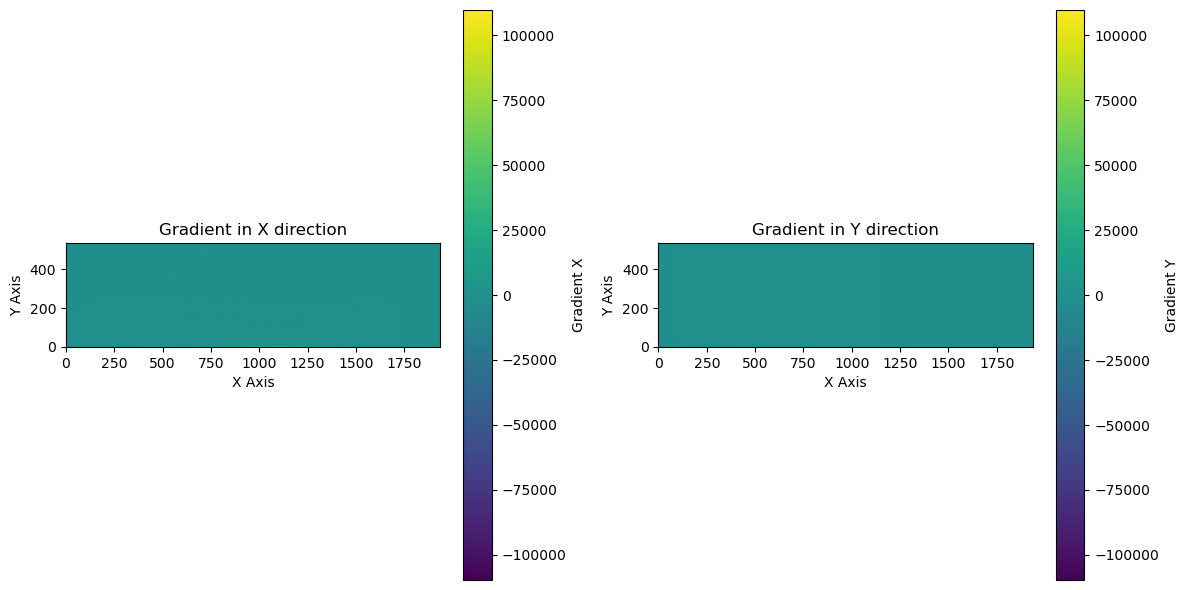

Edge at: 0 and 536


In [5]:
# Find where the edges in the image are
gradient_x, gradient_y = np.gradient(K)

# Visualize the gradients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gradient_x, cmap='viridis', origin='lower')
plt.colorbar(label='Gradient X')
plt.title('Gradient in X direction')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.subplot(1, 2, 2)
plt.imshow(gradient_y, cmap='viridis', origin='lower')
plt.colorbar(label='Gradient Y')
plt.title('Gradient in Y direction')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.tight_layout()
plt.show()

print(f'Edge at: {np.argmax(gradient_x[:,1000])} and {np.argmin(gradient_x[:,1000])}')

### Verify coefficients

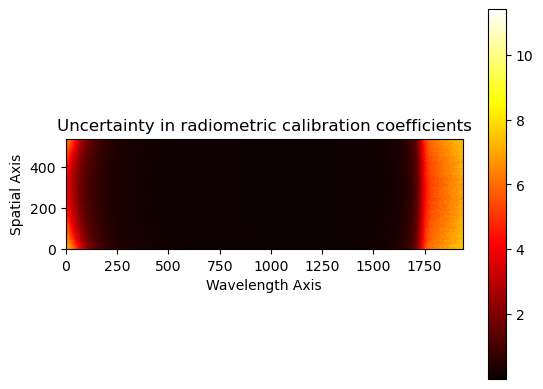

In [6]:
# verify coefficients

base_folder = r'.\Data\radiometric-verify'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16')
datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
avg_cube = np.zeros_like(datacube).astype(float) # init. empty empty average datacube

exposures = [20, 40, 60, 80, 100, 200, 400, 600, 800, 1000]

for i in range(10):
    datacube = np.fromfile(file_list[i+1], dtype='uint16')
    datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
    avg_cube += 1/10 * datacube / (exposures[i]/1000)
# avg_cube = avg_cube.reshape((-1, samples, bands))[:,0,::-1]

avg_L = K/avg_cube
img_L = K/datacube

uncertainty = np.abs( (avg_L-img_L)/avg_L) # equation from lab doc. 

plt.imshow(uncertainty, cmap='hot', origin='lower')
plt.colorbar()
plt.title('Uncertainty in radiometric calibration coefficients')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# Spectral Calibration

## Base code:

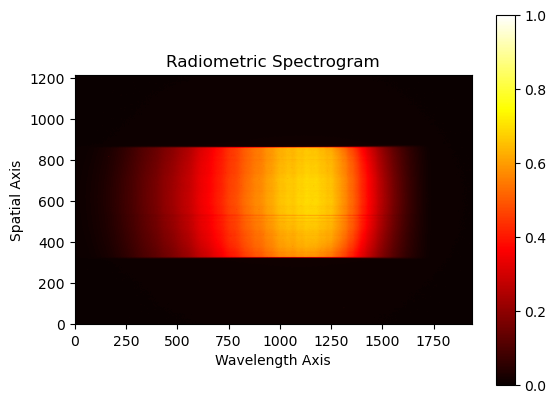

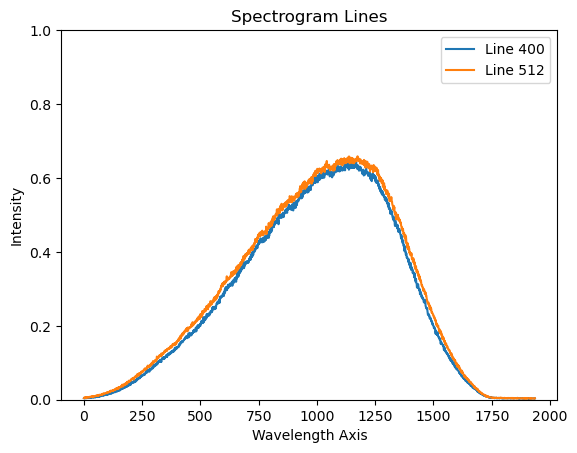

In [7]:

# from mock import create_fake_spectrogram
# from mock import save_spectrogram_as_png


base_folder = r'.\Data\radiometric'
file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))

plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Radiometric Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'uniform_mock_spectrogram.png')
# save_spectrogram_as_png(spectrogram, filename)

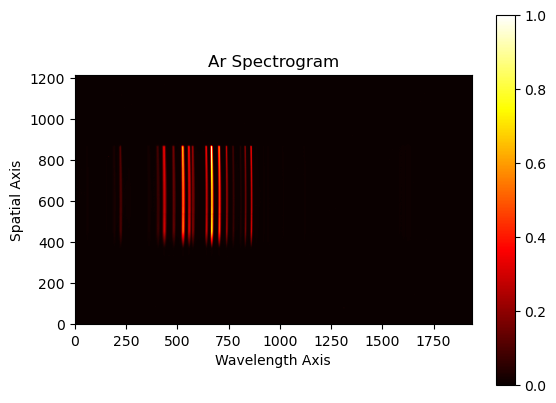

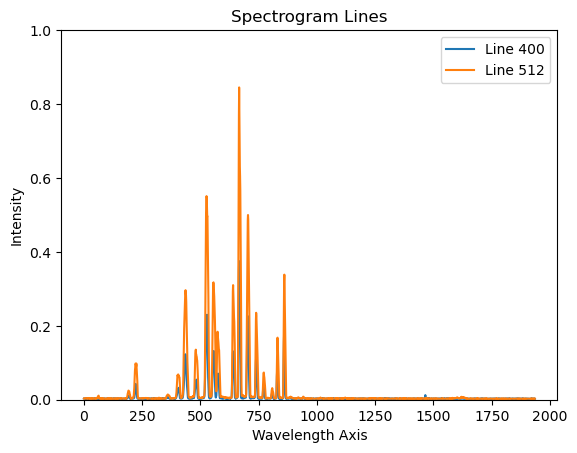

In [8]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/Ar'
file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))


plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Ar Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

## My testing:

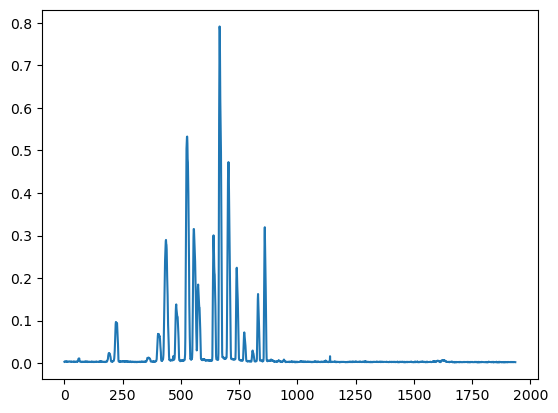

In [9]:
argon_wavelengths = np.array([696.54, 706.72, 763.51, 772.38, 794.82, 800.62, 811.53, 826.45, 840.82, 852.14])
plt.plot(datacube1[600])#[500:600])
# y_values = [0.4]*len(argon_wavelengths)
# x_values = np.linspace(0, len(datacube1[600]) - 1, len(argon_wavelengths))
# plt.scatter(argon_wavelengths, y_values)

[0.16259169 0.18484108 0.22444988 0.28973105 0.300489   0.31540342
 0.3195599  0.47261614 0.53276284 0.79144254]


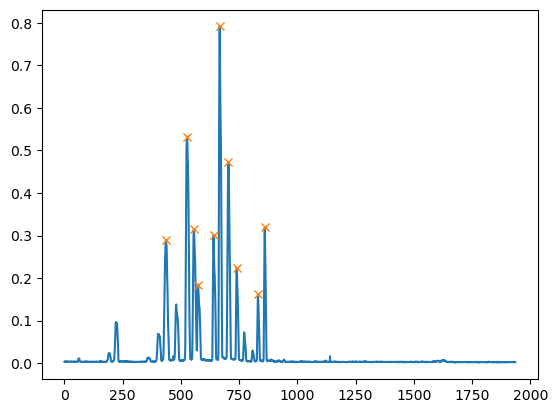

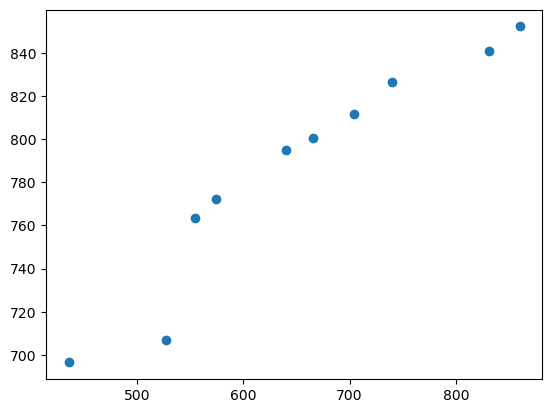

In [11]:
from scipy.signal import find_peaks

num_peaks = 10

peaks, _ = find_peaks(datacube1[600])
# print(peaks)

plt.plot(datacube1[600])#[500:600])
# plt.plot(peaks, datacube1[600][peaks], "x")

peak_array = datacube1[600][peaks]

peak_values = np.partition(peak_array, -num_peaks)[-num_peaks:]
print(np.partition(peak_array, -num_peaks)[-num_peaks:])

# for point in datacube1[600]: if point in peak_values: print(point)
final_points = []
for i in range(len(datacube1[600])):
    if datacube1[600][i] in peak_values and i in peaks: 
        final_points.append(i)

# del final_points[4]

plt.plot(final_points, datacube1[600][final_points], "x")

plt.figure()
plt.scatter(final_points, argon_wavelengths)


10
[-4572.62339548 -4584.20738504 -4586.47056346 -4587.65758051
 -4589.59023147 -4589.41751713 -4588.21540703 -4586.03628982
 -4576.0150264  -4571.46251778]


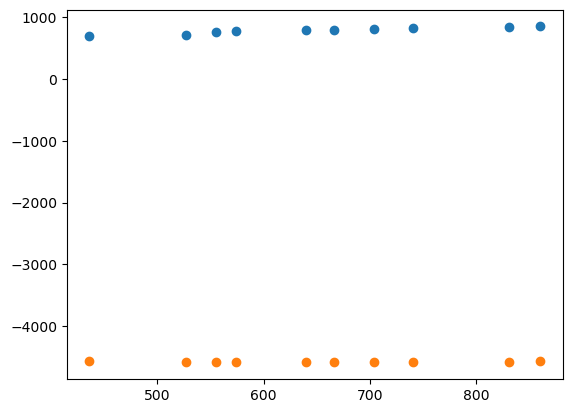

In [16]:
from useful_functions import *

observed_wavelengths = final_points

y_pred = plynominal_model(2,observed_wavelengths, argon_wavelengths)

print(len(y_pred))
print(y_pred)
plt.figure()
plt.scatter(final_points, argon_wavelengths)
plt.scatter(final_points, y_pred)

In [16]:
# Extract the y-values from the datacube1 at index 600
y_values = datacube1[600]
positions = np.argpartition(y_values, -10)[-10:]

# Get the 10 largest values
largest_y_values = np.partition(y_values, -10)[-10:]

# Sort the values in descending order
largest_y_values = np.sort(largest_y_values)[::-1]

# Create a new array with these values
largest_y_values_array = np.array(largest_y_values)

print(largest_y_values_array)
print(positions)

[0.79144254 0.78239609 0.699022   0.69022005 0.6207824  0.58141809
 0.57334963 0.5594132  0.53276284 0.53178484]
[526 527 671 664 670 669 668 665 667 666]


In [17]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/Hg'
file_name1 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))


plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Hg Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

AttributeError: module 'matplotlib' has no attribute 'imshow'

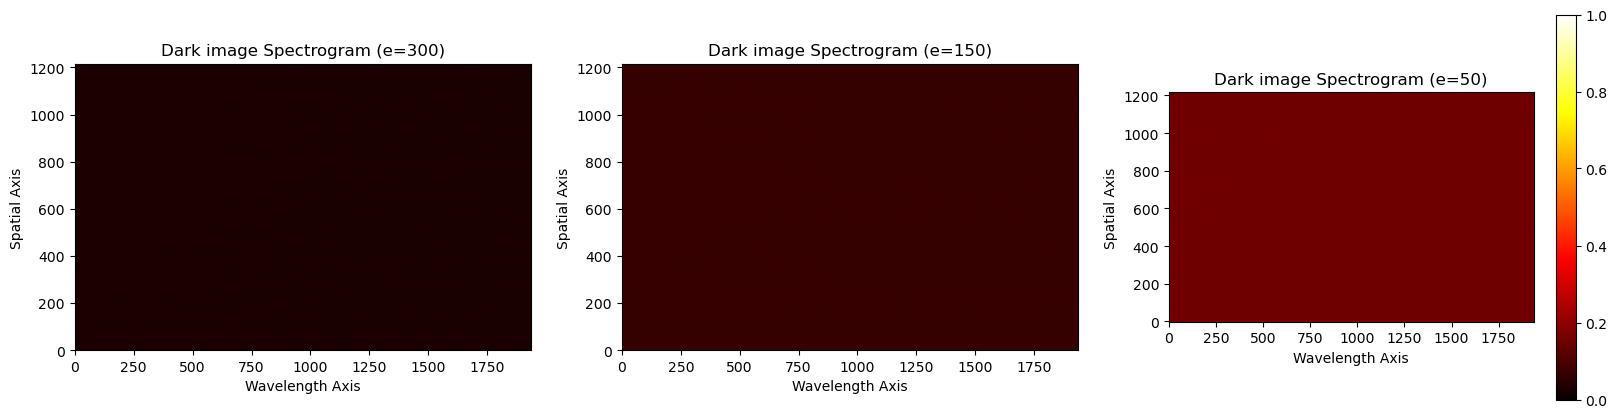

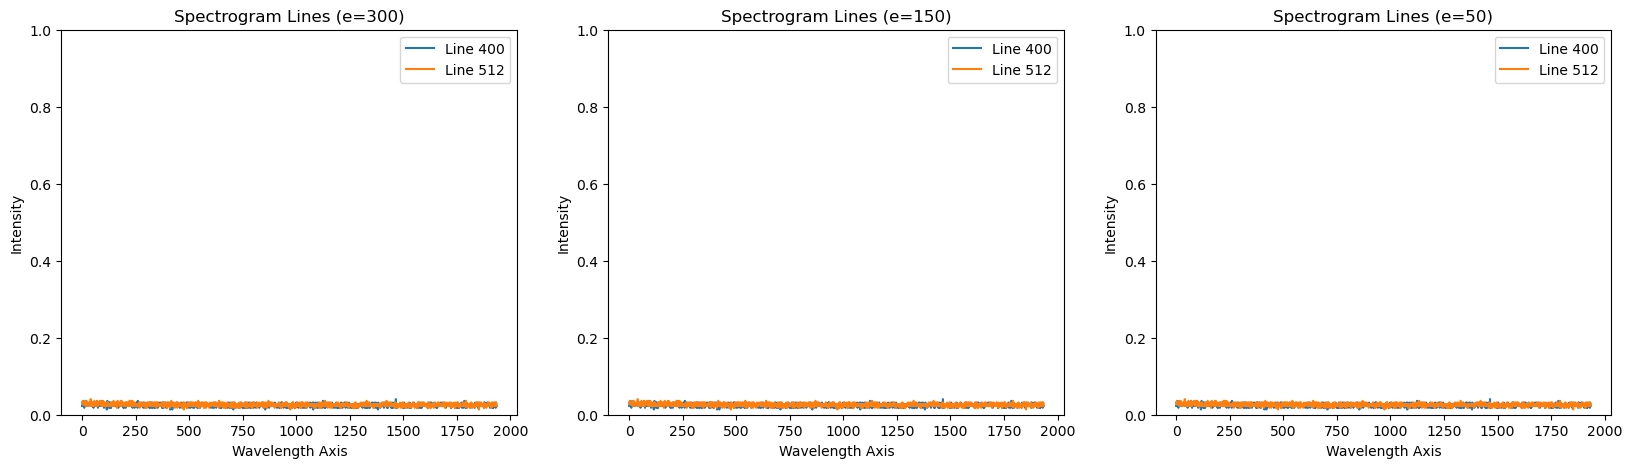

In [12]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/dark-images'
file_name1 =  '1727161965.569_00000_e300.0016_g000_1936x1216.bip'
file_name2 =  '1727162016.993_00000_e150.0014_g000_1936x1216.bip'
file_name3 =  '1727162044.101_00000_e049.9971_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)
file_path2 = os.path.join(base_folder, file_name2)
file_path3 = os.path.join(base_folder, file_name3)

datacube1 = np.fromfile(file_path1, dtype='uint16')
datacube2 = np.fromfile(file_path2, dtype='uint16')
datacube3 = np.fromfile(file_path3, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]
datacube2 = datacube2.reshape((-1, samples, bands))[:,0,::-1]
datacube3 = datacube3.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = (datacube1 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))
datacube2 = (datacube2 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))
datacube3 = (datacube3 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(datacube1, cmap='hot', origin='lower')
# plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()
plt.subplot(1,3,2)
plt.imshow(datacube2, cmap='hot', origin='lower')
# plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=150)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()
plt.subplot(1,3,3)
plt.imshow(datacube3, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=50)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
# plt.show()
plt.subplot(1,3,2)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=150)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
# plt.show()
plt.subplot(1,3,3)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=50)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

In [13]:
np.max(datacube1), np.max(datacube2), np.max(datacube3), np.min([datacube1, datacube2, datacube3])

(np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.0))

((array([2.354149e+06, 1.700000e+01, 5.000000e+00, 2.000000e+00,
         0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 (array([2.354138e+06, 2.500000e+01, 8.000000e+00, 2.000000e+00,
         0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00]),
  array([0.03125 , 0.128125, 0.225   , 0.321875, 0.41875 , 0.515625,
         0.6125  , 0.709375, 0.80625 , 0.903125, 1.      ]),
  <BarContainer object of 10 artists>),
 (array([2.197763e+06, 1.563880e+05, 1.300000e+01, 4.000000e+00,
         3.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
         1.000000e+00, 1.000000e+00]),
  array([0.07272727, 0.16545455, 0.25818182, 0.35090909, 0.44363636,
         0.53636364, 0.62909091, 0.72181818, 0.81454545, 0.90727273,
         1.        ]),
  <BarContainer object of 10 artists>))

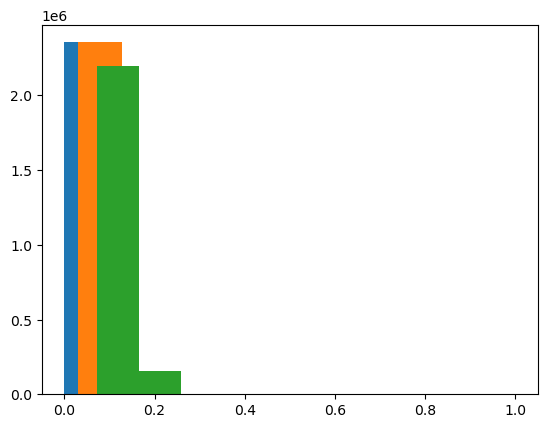

In [14]:
plt.hist(datacube1.flatten()), plt.hist(datacube2.flatten()), plt.hist(datacube3.flatten())